In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from scipy.stats import iqr

# Load the Breast Cancer dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#use label encoding to convert categorical variables to numeric values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = data['diagnosis']
X = data.drop(['diagnosis','id'], axis=1)

In [4]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
import numpy as np
from scipy.stats import iqr

# Train an Isolation Forest model on the training data
clf = IsolationForest(random_state=123, bootstrap=True,n_estimators=100,max_features=1.0, max_samples=0.25)
clf.fit(X_train)

# Predict anomaly scores for the test data
y_pred=clf.predict(X_test)

#print the anomaly scores
anomaly_scores = clf.decision_function(X_test)
print(anomaly_scores)

# Calculate the Interquartile Range (IQR)
iqr_score = iqr(anomaly_scores)

[ 0.0663413   0.07136291  0.01442551 -0.12519119 -0.03420508 -0.06183023
  0.04544018  0.04163855  0.08293461  0.03148803  0.0475817   0.088224
  0.07632738  0.10896628  0.06525853  0.06429501  0.09170731  0.09866842
 -0.02610993  0.01214033  0.02025861  0.0906161   0.02846153  0.02133689
  0.0455316   0.09935642  0.08929047  0.02283909  0.07757109  0.04187828
  0.08063058 -0.07266588  0.10018399  0.07839606  0.10963388  0.01113959
  0.08007878  0.08770458  0.06579213  0.08656709  0.00572454  0.08999561
  0.082055    0.00534622 -0.00976595  0.03021723  0.07068087  0.05631478
  0.09745325  0.06741304  0.04939332 -0.06726401 -0.0862776   0.07422328
  0.08408237  0.00401499  0.07341244  0.01303443  0.02805963  0.03004078
  0.05947789  0.08974649  0.02067534  0.0961946  -0.09026637  0.05516517
 -0.00238594 -0.07346556  0.07489962  0.03423299  0.1124855  -0.00689589
  0.01919621  0.07390008  0.05811946  0.10852184 -0.13828058  0.01741287
  0.05577551  0.05117629  0.02094512  0.07828207 -0.0

In [7]:
import numpy as np

# Calculate the median score
median_score = np.median(anomaly_scores)

# Calculate the threshold using the formula
threshold = np.sqrt((anomaly_scores - median_score)**2 / (iqr_score**2))

print(threshold)

#prune the data


[1.57111364e-01 2.32594087e-01 6.23265752e-01 2.72192734e+00
 1.35426108e+00 1.76951114e+00 1.57065879e-01 2.14210324e-01
 4.06535249e-01 3.66788837e-01 1.24875332e-01 4.86043220e-01
 3.07218035e-01 7.97832709e-01 1.40835627e-01 1.26352316e-01
 5.38402968e-01 6.43039482e-01 1.23257801e+00 6.57615694e-01
 5.35584958e-01 5.22000247e-01 4.12281967e-01 5.19376677e-01
 1.55691668e-01 6.53381318e-01 5.02073997e-01 4.96796303e-01
 3.25912979e-01 2.10606879e-01 3.71902031e-01 1.93238817e+00
 6.65820996e-01 3.38313657e-01 8.07867803e-01 6.72658367e-01
 3.63607629e-01 4.78235526e-01 1.48856373e-01 4.61137274e-01
 7.54055248e-01 5.12673415e-01 3.93313270e-01 7.59741962e-01
 9.86901914e-01 3.85891050e-01 2.22342029e-01 6.39675781e-03
 6.24773642e-01 1.73221334e-01 9.76437672e-02 1.85118946e+00
 2.13699415e+00 2.75590046e-01 4.23787906e-01 7.79752437e-01
 2.63401932e-01 6.44175932e-01 4.18323170e-01 3.88543403e-01
 5.39433683e-02 5.08928606e-01 5.29320921e-01 6.05854081e-01
 2.19695162e+00 1.088369

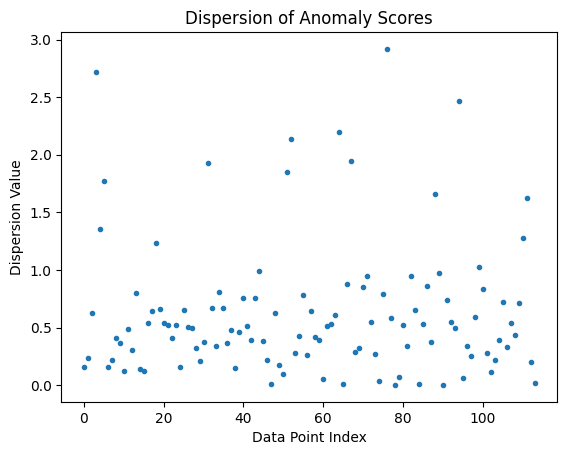

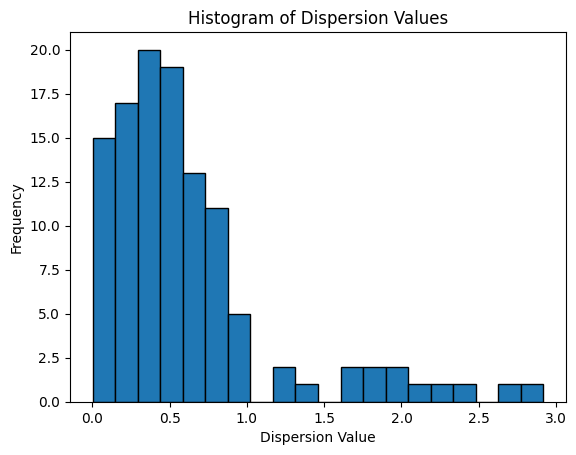

In [8]:
import matplotlib.pyplot as plt

# Calculate the dispersion vector
threshold = np.sqrt((anomaly_scores - median_score)**2 / (iqr_score**2))

# Create a scatter plot of the dispersion values
plt.scatter(range(len(threshold)), threshold, marker='.')
plt.xlabel('Data Point Index')
plt.ylabel('Dispersion Value')
plt.title('Dispersion of Anomaly Scores')
plt.show()

# Alternatively, create a histogram of the dispersion values
plt.hist(threshold, bins=20, edgecolor='k')
plt.xlabel('Dispersion Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dispersion Values')
plt.show()






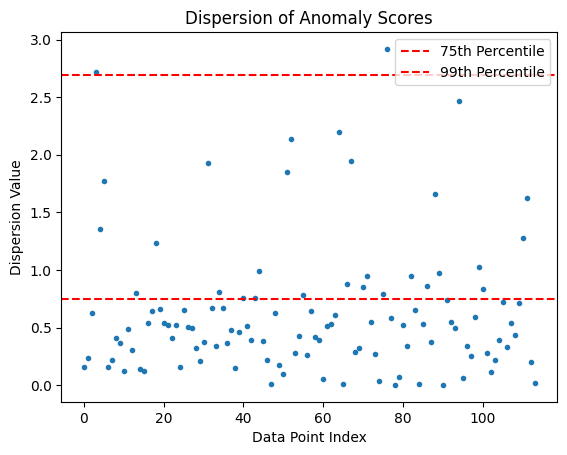

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the dispersion vector
threshold = np.sqrt((anomaly_scores - median_score)**2 / (iqr_score**2))

# Create a scatter plot of the dispersion values
plt.scatter(range(len(threshold)), threshold, marker='.')
plt.xlabel('Data Point Index')
plt.ylabel('Dispersion Value')
plt.title('Dispersion of Anomaly Scores')

# Calculate and mark the desired percentiles (e.g., 95th and 99th percentiles)
percentiles_to_mark = [75, 99]
percentile_values = np.percentile(threshold, percentiles_to_mark)
for percentile in percentiles_to_mark:
    plt.axhline(y=percentile_values[percentiles_to_mark.index(percentile)], color='r', linestyle='--', label=f'{percentile}th Percentile')

plt.legend(loc='upper right')
plt.show()
